In [1]:
#workhorses
import numpy as np
import pandas as pd


#plotting things

#%matplotlib qt5 -- I don't know what this is
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler

In [2]:
#All of Anandh's customized seaborn/matplotlib settings

sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

#%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')

    #If you want to use a different font
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 
#                  'serif': ['Helvetica']})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(9,8))

## get data

In [3]:
data_dict = pd.read_excel('../Local Data/20181004 A=B community screen 1 no sample.xlsx', sheet_name=None)

In [4]:
data_dict.keys()

odict_keys(['OD700', 'BFP', 'YFP', 'IDs', 'Exp', 'OD700_tidy', 'BFP_tidy', 'YFP_tidy'])

## create data you want to plot

In [22]:
ot = data_dict['OD700_tidy']
yt = data_dict['YFP_tidy']
bt = data_dict['BFP_tidy']

In [24]:
yt.head()

,Time,Temp C,well,value,a,b,ba ratio,atc,iptg
0,0.137778,37.0,A1,566,51,0,n,0,1
1,0.304444,37.0,A1,520,51,0,n,0,1
2,0.471111,37.0,A1,493,51,0,n,0,1
3,0.637778,37.0,A1,486,51,0,n,0,1
4,0.804444,37.0,A1,507,51,0,n,0,1


In [25]:
#select only the rows where the A cell is number 6-1
idx = ot['a'] == 52
#select only the rows where the ratio between A and B is known and defined (e.g. not 0 or inf)
idx2 = ~ot['ba ratio'].isin(['n', 'x'])
#select only B cell 1-1
idx3 = ot['b'] == 21
#make the union of these indices to slice the data
big_idx = idx & idx3

In [28]:
sli = bt.loc[big_idx, :]

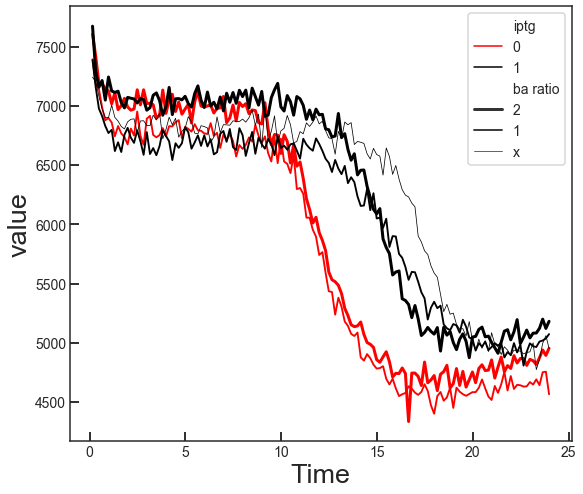

In [29]:
sns.lineplot(x='Time', y='value', data=sli, hue='iptg', size='ba ratio')

## plot data

In [19]:
#select only the rows where the A cell is number 6-1
idx = ot['a'] == 52
#select only the rows where the ratio between A and B is known and defined (e.g. not 0 or inf)
idx2 = ~ot['ba ratio'].isin(['n', 'x'])
#select only B cell 1-1
idx3 = ot['b'] == 21
#make the union of these indices to slice the data
big_idx = idx & idx3

In [20]:
sli = ot.loc[big_idx, :]

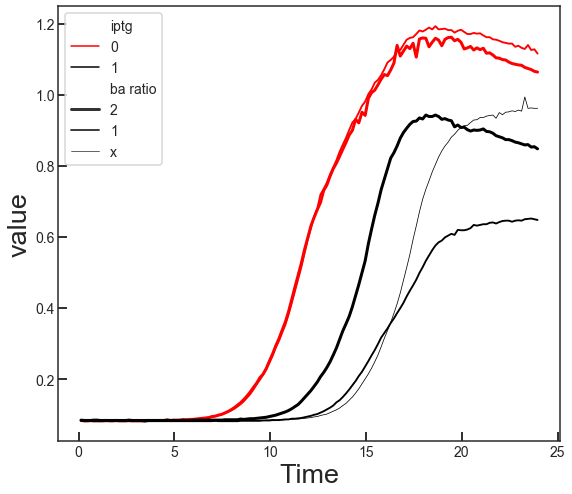

In [21]:
sns.lineplot(x='Time', y='value', data=sli, hue='iptg', size='ba ratio')

(0, 10000)

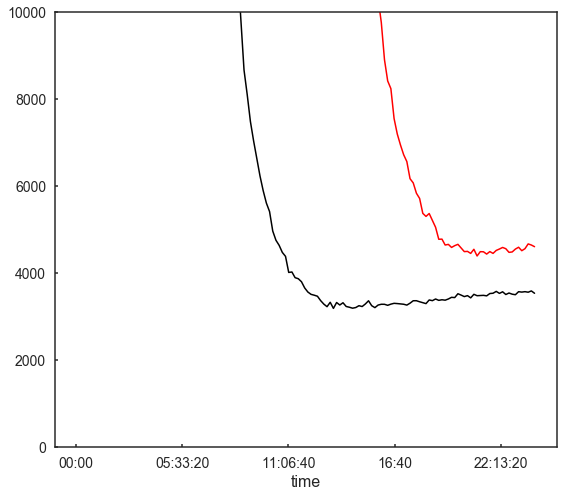

In [19]:
#showing "final" BFP/OD for non induced monoculture and non induced mixed culture

plt.plot(data_dict['OD700']['Time'], (data_dict['BFP']['B1'] / data_dict['OD700']['B1']))
plt.plot(data_dict['OD700']['Time'], (data_dict['BFP']['B9'] / data_dict['OD700']['B9']))

plt.ylim([0, 10000])

(0, 10000)

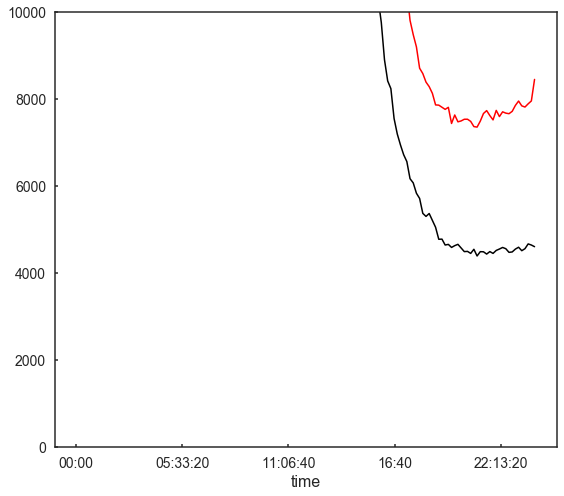

In [21]:
plt.plot(data_dict['OD700']['Time'], (data_dict['BFP']['A1'] / data_dict['OD700']['A1']))
plt.plot(data_dict['OD700']['Time'], (data_dict['BFP']['B1'] / data_dict['OD700']['B1']))

plt.ylim([0, 10000])

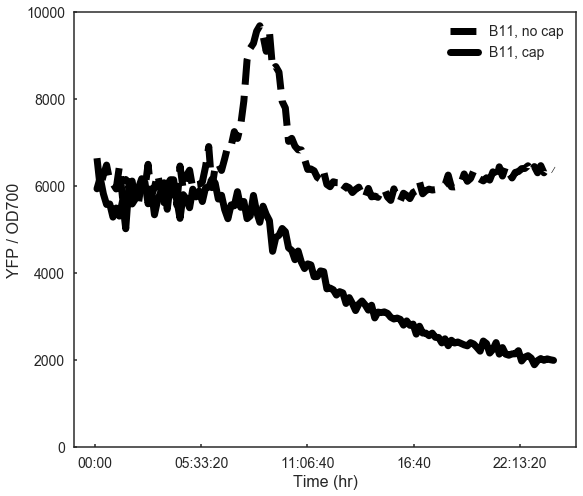

In [49]:
#show the uncapped YFP/OD for B1-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['B5'] / data_dict['OD700']['B5']), 'k--',linewidth=7)

#show the capped YFP/OD for B1-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['A5'] / data_dict['OD700']['A5']), 'k', linewidth=7)

#show the induced YFP/OD for all different A's with B1-1
for well, col in zip(['A9', 'A10', 'A11', 'A12'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), color=col, linewidth=3)
    
#show the uninduced YFP/OD for all different A's with B1-1
for well, col in zip(['B9', 'B10', 'B11', 'B12'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), '--', color=col, linewidth=3)

plt.ylim([0, 10000])

labels = ['B11, no cap', 'B11, cap', 'B11 + A51', 'B11 + A52', 'B11 + A61', 'B11 + A81']

plt.legend(labels)

plt.xlabel('Time (hr)')
plt.ylabel('YFP / OD700')

#plt.savefig('../Local Data/B11_cap-nocap.pdf')

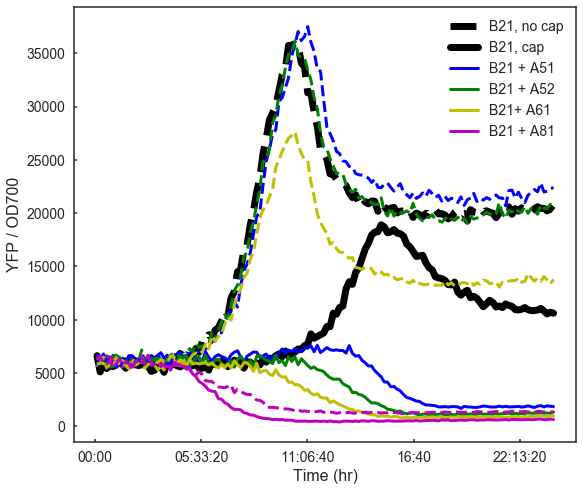

In [54]:
#show the uncapped YFP/OD for B2-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['B6'] / data_dict['OD700']['B6']), 'k--',linewidth=7)

#show the capped YFP/OD for B2-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['A6'] / data_dict['OD700']['A6']), 'k', linewidth=7)

#show the induced YFP/OD for all different A's with B2-1
for well, col in zip(['C1', 'C2', 'C3', 'C4'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), color=col, linewidth=3)
    
#show the uninduced YFP/OD for all different A's with B1-1
for well, col in zip(['D1', 'D2', 'D3', 'D4'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), '--', color=col, linewidth=3)

#plt.ylim([0, 10000])

labels = ['B21, no cap', 'B21, cap', 'B21 + A51', 'B21 + A52', 'B21+ A61', 'B21 + A81']

plt.legend(labels)

plt.xlabel('Time (hr)')
plt.ylabel('YFP / OD700')

#plt.savefig('../Local Data/B21+As_yfp-od.pdf')